In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#### Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

## 1. Data Exploration & Preprocessing

In [2]:
# All column names are secured
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.shape # 30 independent variables

(284807, 31)

In [4]:
neg, pos = np.bincount(df['Class'])
total = neg + pos
print('Total observations: {}\nFraud: {} ({:.2f}% of the Total)\n'.format(total, pos, 100 * pos / total))

Total observations: 284807
Fraud: 492 (0.17% of the Total)



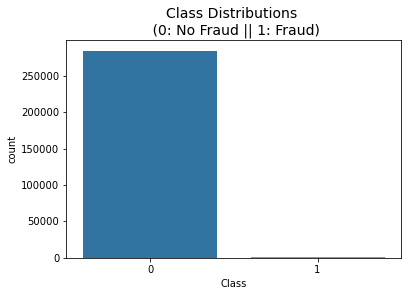

In [5]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

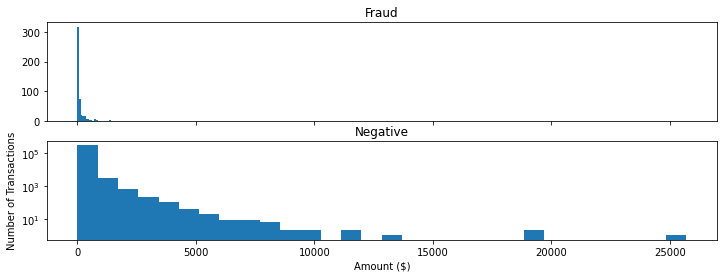

In [6]:
# Fraud are focused on relatively low amount transactions
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Negative')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

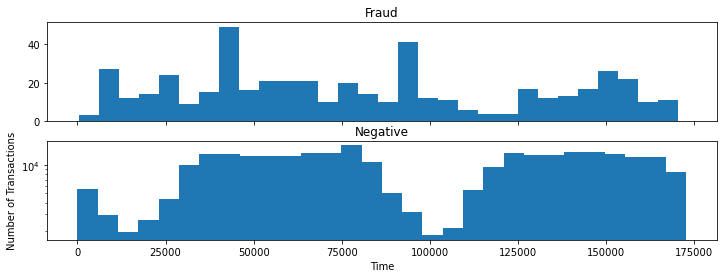

In [7]:
# Fraud is relatively uniformly distributed
# 'Off-Peak' transactions are more likely to be considered as fraud transactions
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Negative')

plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [8]:
X = df.iloc[:,:-1]
y = df['Class']

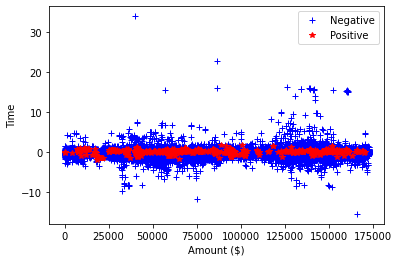

In [9]:
plt.plot( X[y == 0].iloc[:,0], X[y == 0].iloc[:,-2], 'b+', label = 'Negative')
plt.plot( X[y == 1].iloc[:,0], X[y == 1].iloc[:,-2], 'r*', label = 'Positive')
plt.xlabel('Amount ($)')
plt.ylabel('Time')
plt.legend()
plt.show()

In [10]:
# No null values
df.isnull().sum() == 0

Time      True
V1        True
V2        True
V3        True
V4        True
V5        True
V6        True
V7        True
V8        True
V9        True
V10       True
V11       True
V12       True
V13       True
V14       True
V15       True
V16       True
V17       True
V18       True
V19       True
V20       True
V21       True
V22       True
V23       True
V24       True
V25       True
V26       True
V27       True
V28       True
Amount    True
Class     True
dtype: bool

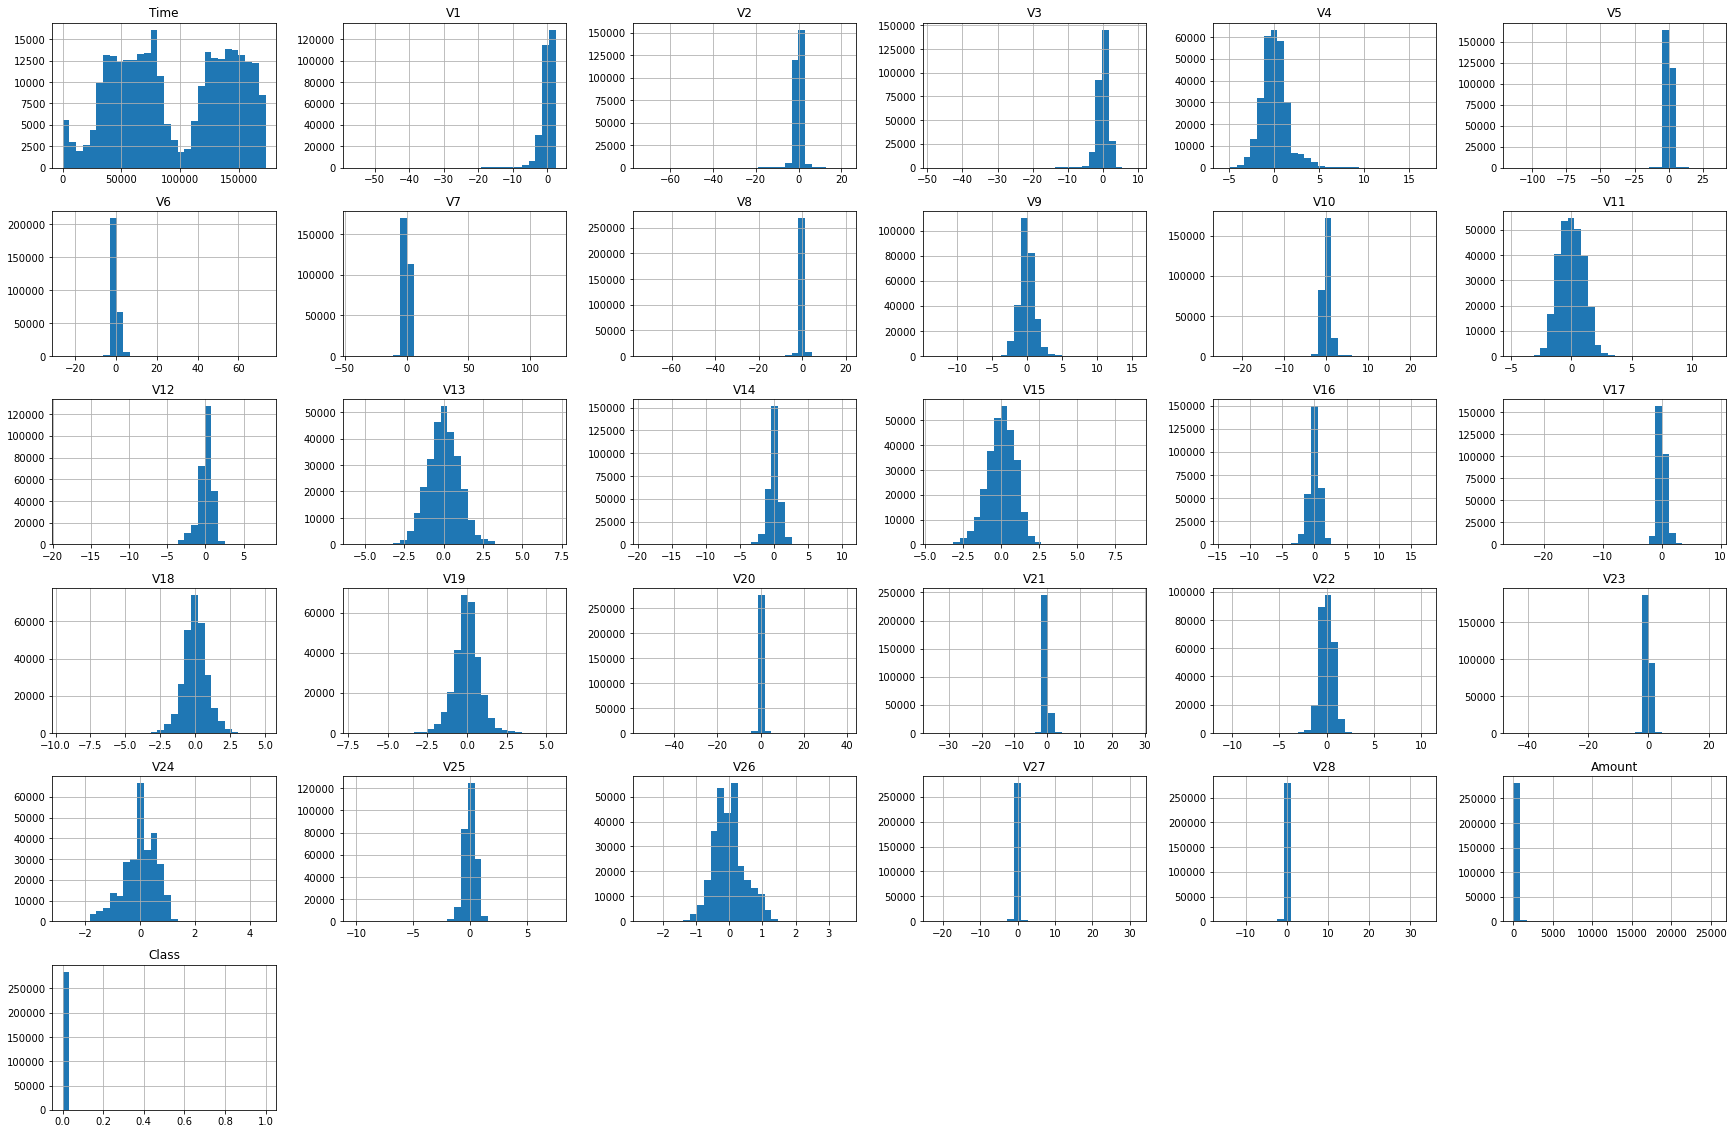

In [11]:
# Check Distributions of each variable
df.hist(figsize = (30,20), bins = 30)
plt.show()

In [12]:
def remove_outliers(feature,feature_name,dataset):

    q1, q3 = np.percentile(feature, 25), np.percentile(feature, 75)
    box = q3 - q1    
    fence = box * 1.5
    lower_fence = q1 - box
    upper_fence = q3 + box
    
    outliers = [x for x in feature if x < lower_fence or x > upper_fence]

    dataset = dataset.drop(dataset[(dataset[feature_name] > upper_fence)\
                                   | (dataset[feature_name] < lower_fence)].index)
    
    return dataset

for col in df:
    new_data = remove_outliers(df[col],str(col),df)
print("Removed {} outliers".format(len(df) - len(new_data)))
print("Removed {} Positives".format(df.iloc[:,-1].sum()-new_data.iloc[:,-1].sum()))

# Can't remove outliers as all the positives are getting removed
del new_data

Removed 492 outliers
Removed 492 Positives


# Transform skewed datas

In [13]:
def feature_transormation(data):
    cnt = 0
    for col in data:
        skew = data[col].skew()
        if abs(skew) > 3:
            data[col] = np.log1p(data[col])
            print("{} has been transformed".format(col))
            cnt += 1
        else:
            continue;
    print("{} features has been transformed".format(cnt))
    return data
X = feature_transormation(df.iloc[:,:-1]) 
y = df.iloc[:,-1]

V1 has been transformed
V2 has been transformed
V8 has been transformed
V17 has been transformed
V21 has been transformed
V23 has been transformed
V28 has been transformed
Amount has been transformed
8 features has been transformed


In [14]:
X = X.drop('Time', axis = 1)

### Undersampling Method (Only applied to Train set)


In [15]:
bool_y = (y != 0)
posX = np.array(X.index[bool_y])
negX = np.random.choice(X.index[~bool_y], 1000-492, replace = False) # sample 1000 rows for whole process

In [16]:
under_sample_indices = np.concatenate([posX, negX])
under_sample_df = df.iloc[under_sample_indices,:]

In [17]:
under_sample_df.shape

(1000, 31)

In [18]:
under_X = under_sample_df.iloc[:,:-1]
under_y = under_sample_df.iloc[:,-1]

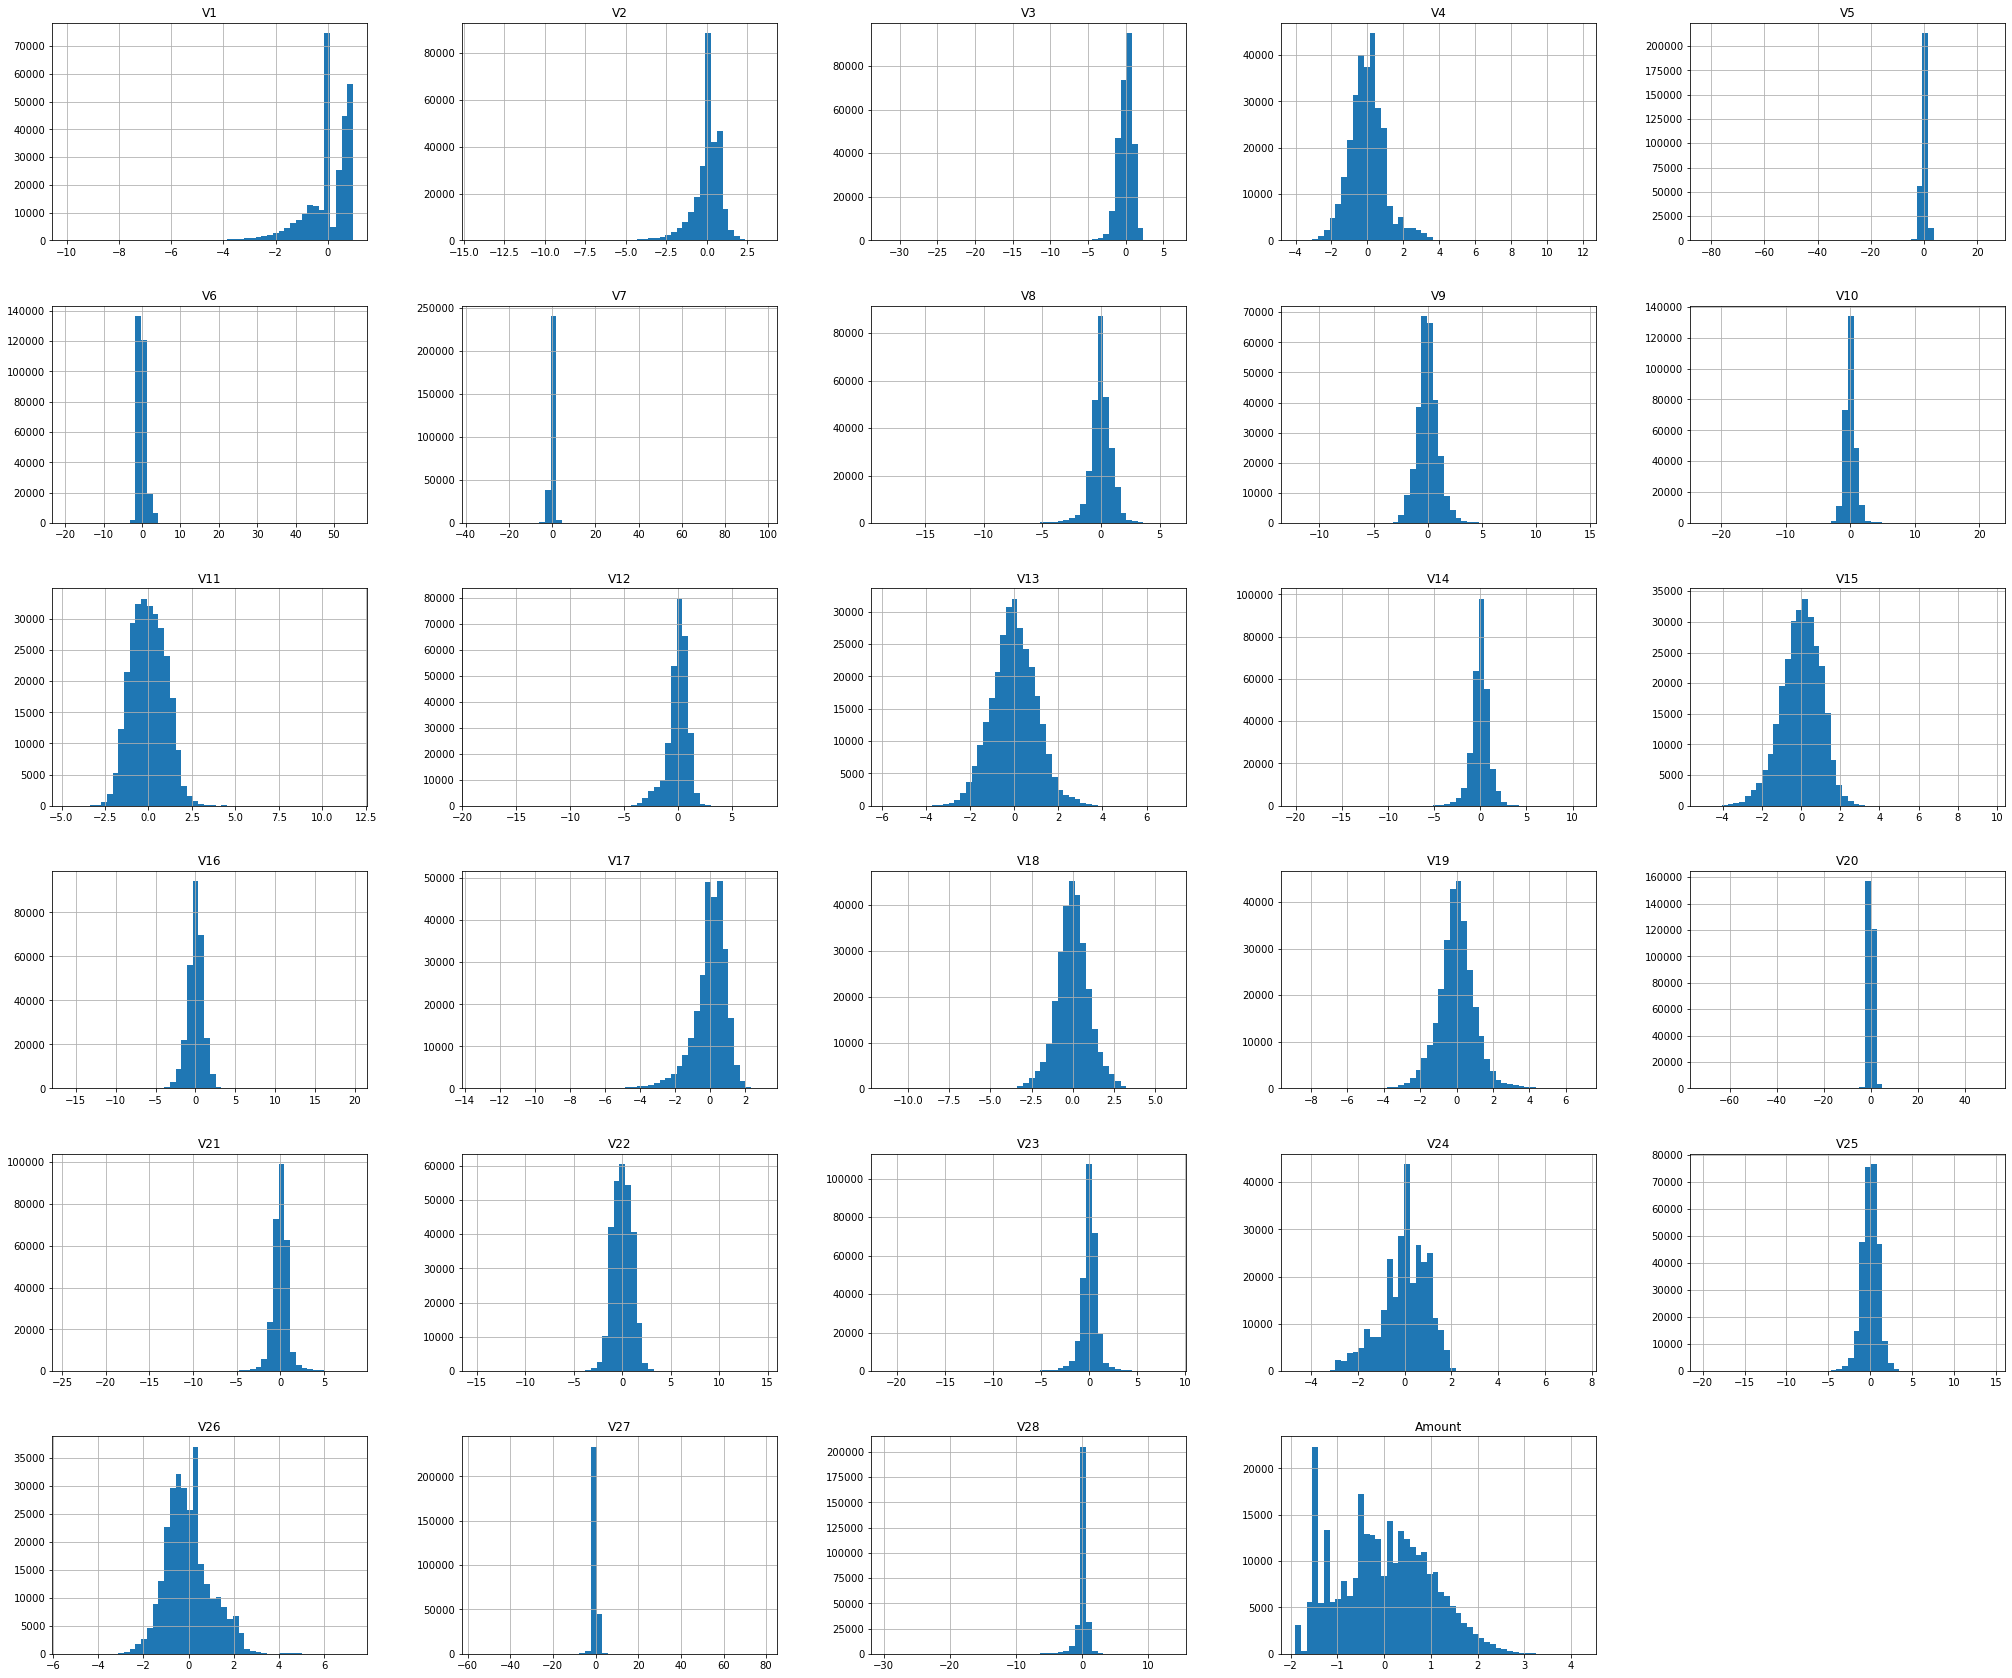

In [19]:
# scale datas before dividing
X_scaled = X.apply(lambda x: (x - x.mean()) / (x.std()))
X_scaled.fillna(0, inplace=True)
X_scaled.hist(figsize = (35,30), bins = 50)
plt.show()

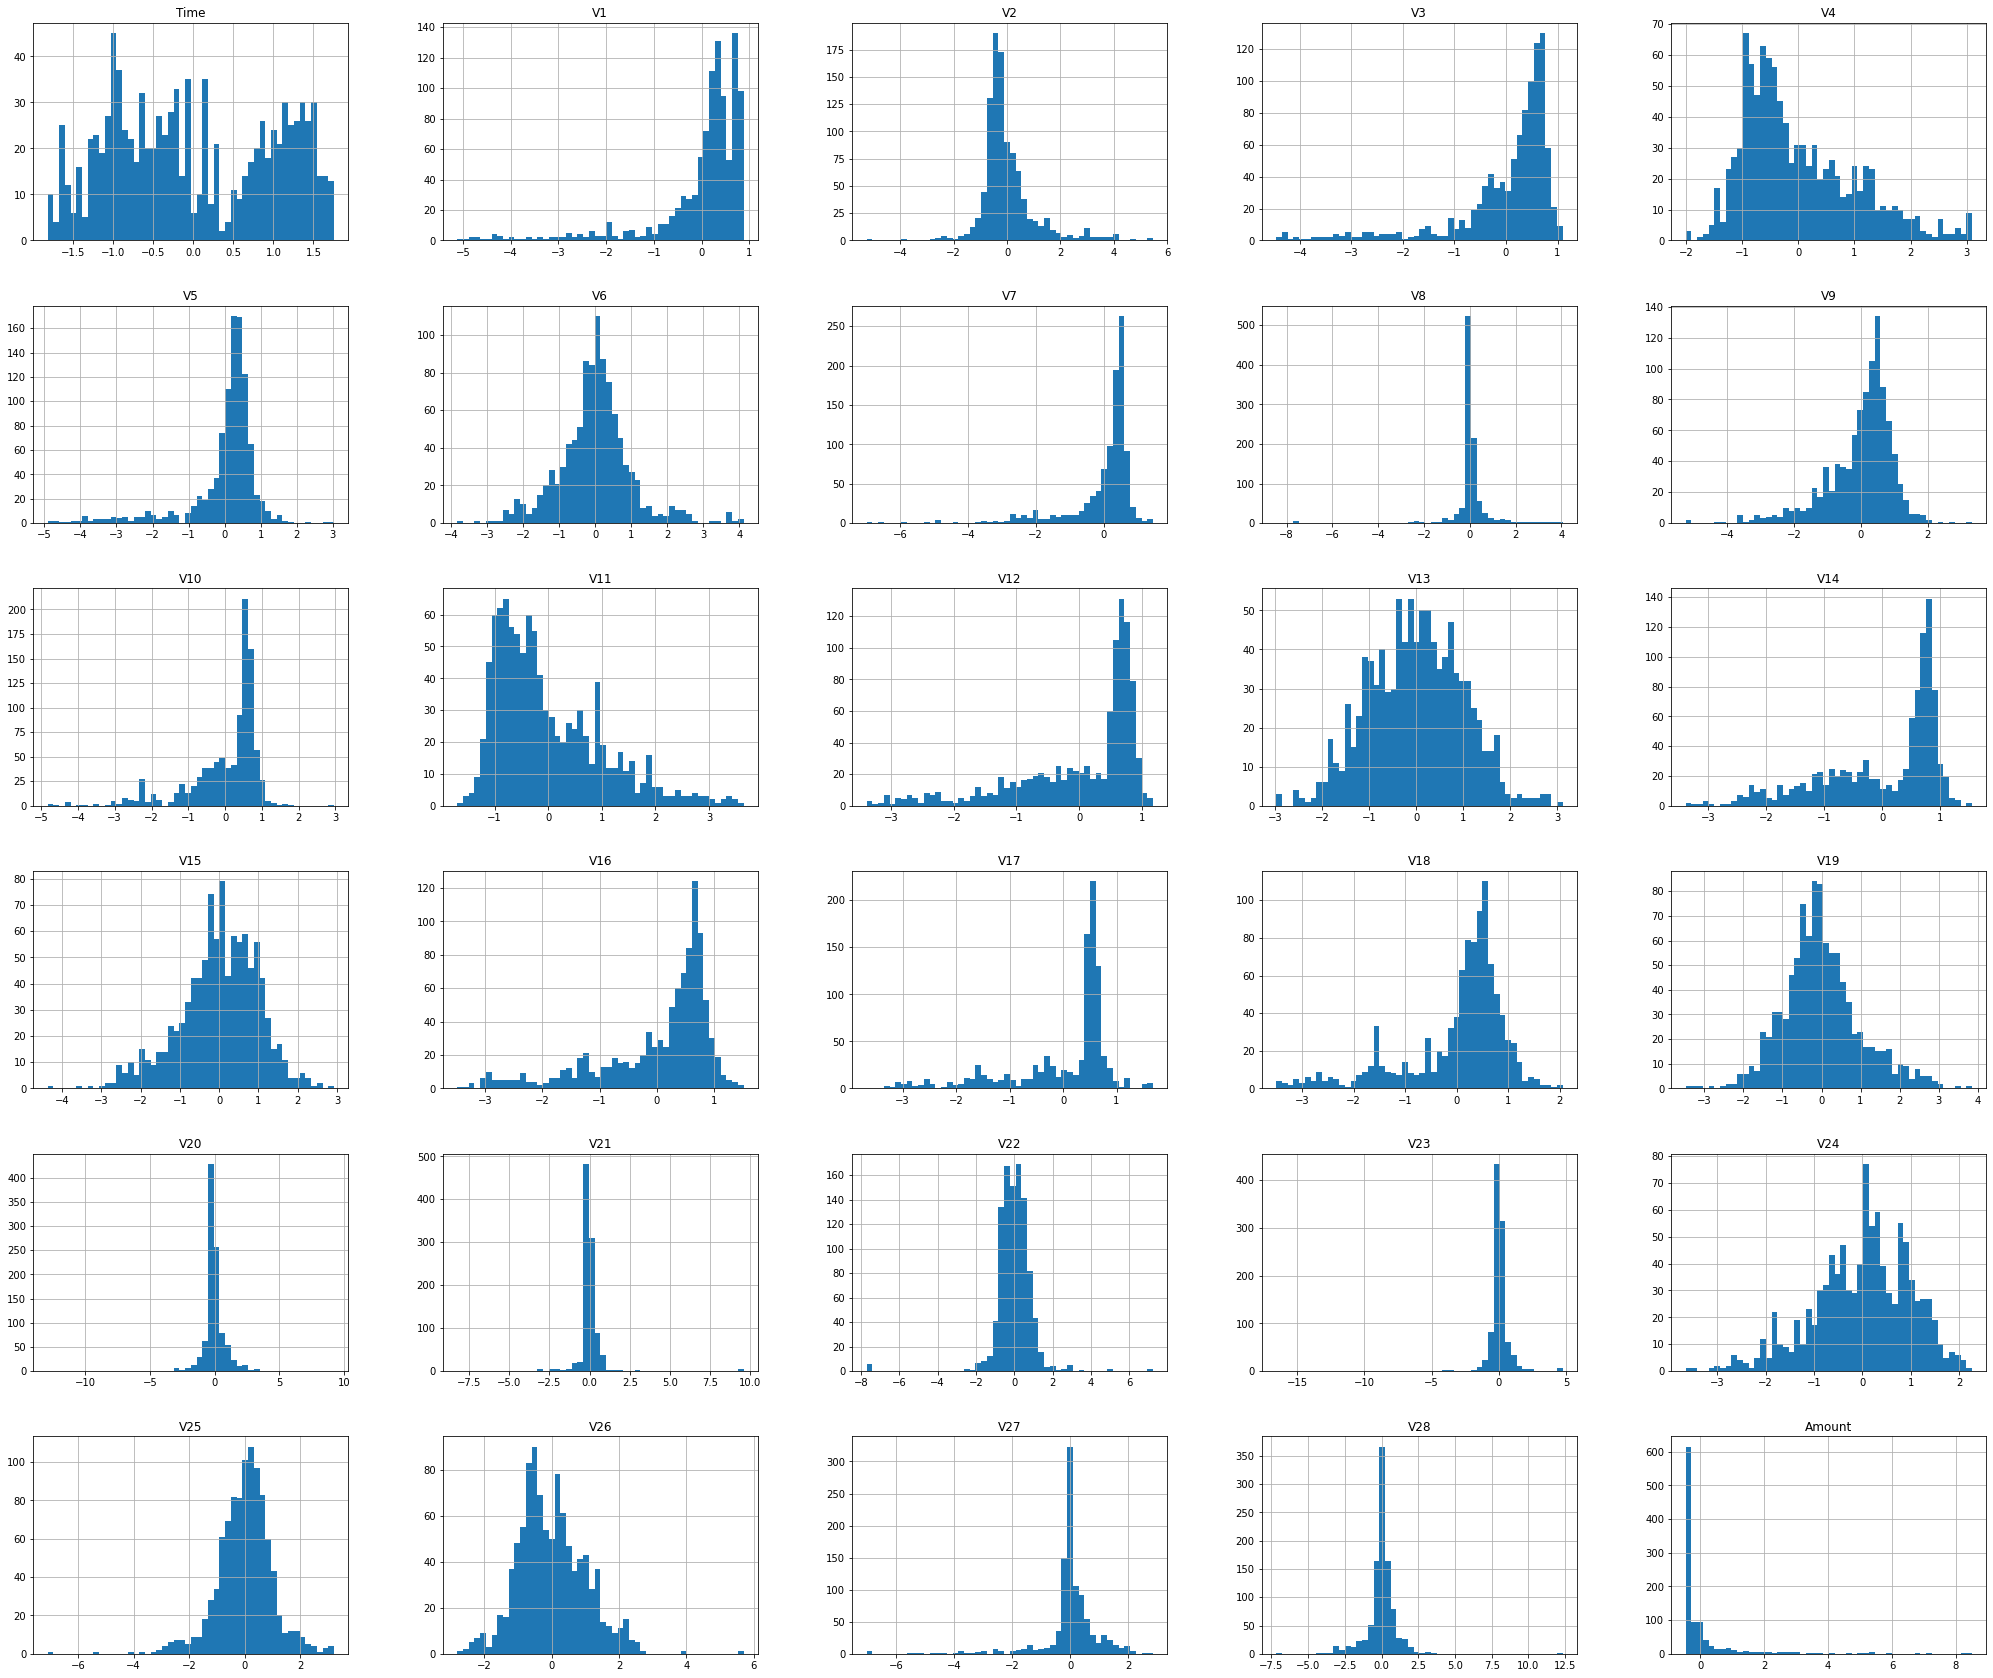

In [20]:
under_X_scaled = under_X.apply(lambda x: (x - x.mean()) / (x.std()))
under_X_scaled.fillna(0, inplace=True)
under_X_scaled.hist(figsize = (35,30), bins = 50)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                   test_size = 0.2, random_state=0)

# under sampled data set
UX, UX_test, Uy, Uy_test = train_test_split(under_X_scaled,under_y,
                                                   test_size = 0.2, random_state=0)

## 2. ML Models

#### As Predicting actual Positive as Negative is very painful at Fraud Detection, going to use recall_score (TP/(FN + TP))

In [22]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, recall_score

# dictionary to save results
res= dict()

## 2-1. Full Train set (Imbalanced)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LR = dict()
costs = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]
best_LR = 0
for cost in costs:
    lf_clf = LogisticRegression(penalty = 'l2', C = cost) # 
    lf_clf.fit(X_train, y_train)
    y_pred0 = lf_clf.predict(X_test)
    score = recall_score(y_test, y_pred0)
    LR[cost] = recall_score(y_test, y_pred0)
    if score > best_LR:
        best_LR = score
res['Logistic Regression'] = best_LR
print(f'Recall Score of Logistic Regression is {best_LR:.5f}')

Recall Score of Logistic Regression is 0.62376


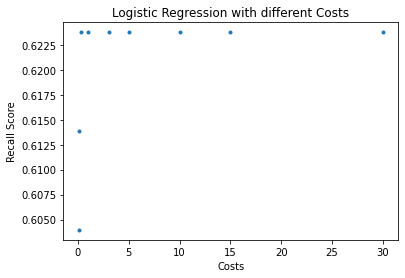

In [24]:
LR_sr = pd.Series(LR)
LR_sr.plot(style = '.',title = "Logistic Regression with different Costs")
plt.xlabel("Costs")
plt.ylabel("Recall Score")
plt.show()

In [25]:
opt_cost = max(LR, key = LR.get) # get key for maximum value
lf_clf = LogisticRegression(penalty = 'l2', C = opt_cost)
lf_clf.fit(X_train, y_train)
y_pred0 = lf_clf.predict(X_test)
print(classification_report(y_test, y_pred0))
print(f'Best cost for Logistic Regression is {opt_cost}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.62      0.73       101

    accuracy                           1.00     56962
   macro avg       0.94      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Best cost for Logistic Regression is 0.3


### Support Vector Machine

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from datetime import datetime
svm_param = [ {'C':[1, 3, 5, 7, 10], 'kernel':['rbf'], 'gamma':[0.01, 0.2, 0.3, 0.6,1]}]
svm_model = SVC(random_state = 42)

t1=datetime.now()
random_svm = RandomizedSearchCV(svm_model,  
                           param_distributions = svm_param,
                           scoring = 'recall',
                           cv = 4, n_iter = 15,
                           verbose=1, refit = True)
random_svm.fit(X_train, y_train)
t2=datetime.now()

print(f'Total computing time: {(t2-t1).total_seconds():.2f} seconds')

print('RandomSearch CV best score : {:.4f}\n'.format(random_svm.best_score_))
print()
y_pred_svm = random_svm.best_estimator_.predict(X_test)
print(f'Recall score on test set {recall_score(y_test,y_pred_svm ):.4f}')
res['Support Vector Machine'] = recall_score(y_test,y_pred_svm )
print()
# print parameters that give the best results
print('Parameters that give the best results :','\n', (random_svm.best_params_))

y_pred_svm = random_svm.best_estimator_.predict(X_test)
confusion_matrix(y_test, y_pred_svm)

print(classification_report(y_test, y_pred_svm))

### XG Boost Classifier

In [27]:
import xgboost
from xgboost import XGBClassifier
from datetime import datetime

In [28]:
t1=datetime.now()
param_grid = {
    'max_depth':[5,6,7,8,9], # max depth of a tree
    'n_estimators':np.arange(101,401,40), # number of trees
    'colsample_bytree':[0.7,0.9],
    'reg_lambda' : [0.5,1,1.5,2],
    'scale_pos_weight' : [neg/pos]
}

random_xg = RandomizedSearchCV(XGBClassifier(objective = 'binary:logistic',
                                       eval_metric = 'auc', use_label_encoder=False), param_distributions=param_grid, cv=3, n_iter = 20,
                      verbose=1, scoring='f1', refit=True
                      )
random_xg_result = random_xg.fit(X_train, y_train)
t2=datetime.now()

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [29]:
print('Total computing time = {:f} seconds'.format((t2-t1).total_seconds()))

Total computing time = 1533.863745 seconds


In [30]:
xg_df = pd.DataFrame(random_xg.cv_results_)

xg_final = random_xg_result.best_estimator_

xg_y_pred = xg_final.predict(X_test)
xg_recall = recall_score(y_test, xg_y_pred)
res['XG Boost'] = xg_recall
print("Recall score with xgboost : {:.6f}".format(xg_recall))

Recall score with xgboost : 0.841584


In [31]:
print(classification_report(y_test, xg_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.84      0.88       101

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



### V12, 14, 7, 10 seem to be critical features

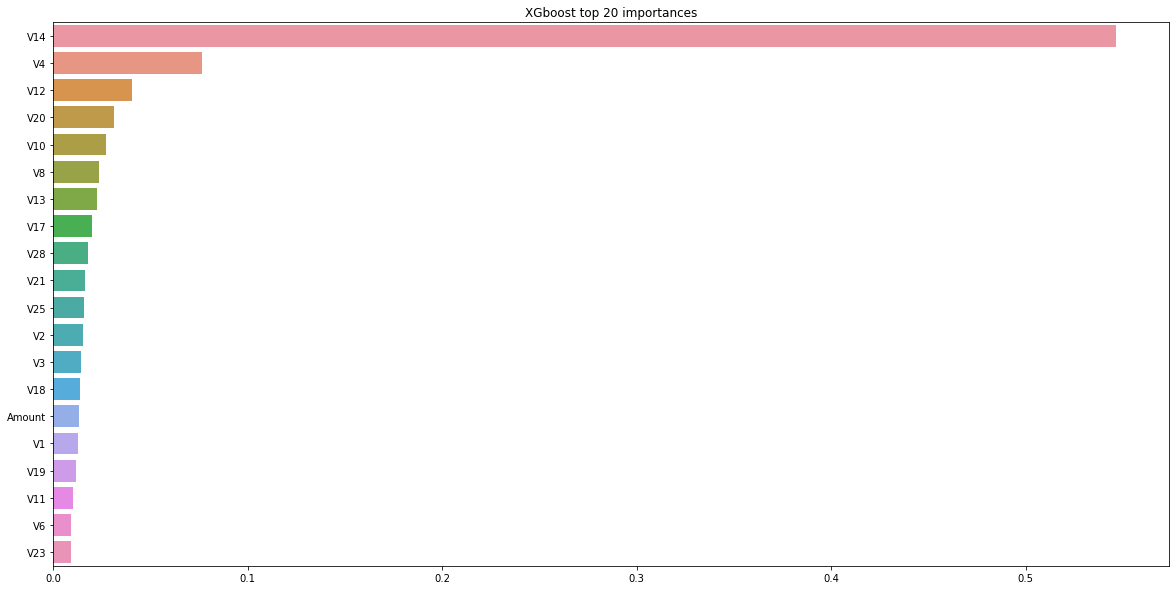

In [32]:
imp_valuexg = pd.Series(xg_final.feature_importances_, index = X_train.columns)
imp_valuexg.sort_values(ascending = False, inplace = True)
plt.figure(figsize = (20,10))
sns.barplot( x = imp_valuexg[:20], y = imp_valuexg.index[:20])
plt.title("XGboost top 20 importances")
plt.show()

## 2-2. Under Sampled Data Set (1000 rows)

### Logistic Regression

In [33]:
LR = dict()
costs = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]
best_LR = 0
for cost in costs:
    lf_clf = LogisticRegression(penalty = 'l2', C = cost) # 
    lf_clf.fit(UX, Uy)
    y_pred0 = lf_clf.predict(UX_test)
    score = recall_score(Uy_test, y_pred0)
    LR[cost] = recall_score(Uy_test, y_pred0)
    if score > best_LR:
        best_LR = score
res['Logistic Regression (Undersample)'] = best_LR
print(f'Recall Score of Logistic Regression is {best_LR:.5f} (UnderSample)')

Recall Score of Logistic Regression is 0.92473 (UnderSample)


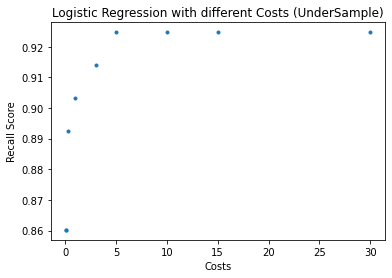

In [34]:
LR_sr = pd.Series(LR)
LR_sr.plot(style = '.',title = "Logistic Regression with different Costs (UnderSample)")
plt.xlabel("Costs")
plt.ylabel("Recall Score")
plt.show()

In [35]:
opt_cost = max(LR, key = LR.get) # get key for maximum value
lf_clf = LogisticRegression(penalty = 'l2', C = opt_cost)
lf_clf.fit(UX, Uy)
y_pred0 = lf_clf.predict(UX_test)
print(classification_report(Uy_test, y_pred0))
print(f'Best cost for Logistic Regression (UnderSample) is {opt_cost}')

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       107
           1       0.98      0.92      0.95        93

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

Best cost for Logistic Regression (UnderSample) is 5


## Support Vector Machine


In [36]:
svm_param = [{'C':[0.1,0.5,0.7,1,3,5,7,0], 'kernel':['rbf'], 'gamma':[0.2, 0.3, 0.6,0.7,0.8,0.9]},
              {'C':[0.1,0.5,0.7,1, 3, 5, 7, 10], 'kernel':['poly'], 'degree': [2,3,4,5] ,'gamma':[0.3,0.5,1]}]
svm_model = SVC(random_state = 42)

In [37]:
grid_svm = GridSearchCV(estimator = svm_model,  
                           param_grid = svm_param,
                           scoring = 'recall',
                           cv = 5,
                           verbose=1, refit = True)
grid_svm.fit(UX, Uy)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 0.5, 0.7, 1, 3, 5, 7, 0],
                          'gamma': [0.2, 0.3, 0.6, 0.7, 0.8, 0.9],
                          'kernel': ['rbf']},
                         {'C': [0.1, 0.5, 0.7, 1, 3, 5, 7, 10],
                          'degree': [2, 3, 4, 5], 'gamma': [0.3, 0.5, 1],
                          'kernel': ['poly']}],
             scoring='recall', verbose=1)

In [38]:
print('Grid CV best score : {:.4f}\n'.format(grid_svm.best_score_))
y_pred_svm = grid_svm.best_estimator_.predict(UX_test)

res['Support Vector Machine (UnderSample)'] = recall_score(Uy_test, y_pred_svm)
print(f'Recall score on test set: {recall_score(Uy_test, y_pred_svm):.4f}')
print()
# print parameters that give the best results
print('Parameters that give the best results :','\n', (grid_svm.best_params_))

Grid CV best score : 0.9699

Recall score on test set: 0.9462

Parameters that give the best results : 
 {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


In [39]:
confusion_matrix(Uy_test, y_pred_svm)

array([[69, 38],
       [ 5, 88]])

In [40]:
print(classification_report(Uy_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76       107
           1       0.70      0.95      0.80        93

    accuracy                           0.79       200
   macro avg       0.82      0.80      0.78       200
weighted avg       0.82      0.79      0.78       200



### XG Boost Classifier

In [42]:
t1=datetime.now()
param_grid = {
    'max_depth':[2,3,4,5,6], 
    'n_estimators':[50, 100, 150, 200, 250],
    'colsample_bytree':[0.7,0.9],
    'reg_alpha' : [0.5, 1, 1.5, 2],
    'scale_pos_weight' : [neg/pos]

}

grid_xg = GridSearchCV(estimator = XGBClassifier(objective = 'binary:logistic',
                                       eval_metric = 'auc', use_label_encoder=False), param_grid=param_grid,
                                       cv=3, verbose=1, scoring='f1', refit=True
                      )
grid_xg_result = grid_xg.fit(UX, Uy)
t2=datetime.now()

Fitting 3 folds for each of 200 candidates, totalling 600 fits


In [43]:
print('Total computing time = {:f} seconds'.format((t2-t1).total_seconds()))

Total computing time = 72.475345 seconds


In [44]:
xg_df = pd.DataFrame(grid_xg.cv_results_)

xg_final = grid_xg_result.best_estimator_

xg_y_pred = xg_final.predict(UX_test)
xg_recall = recall_score(Uy_test, xg_y_pred)
res['XG Boost (Undersample)'] = xg_recall
print("Recall score with xgboost : {:.6f}".format(xg_recall))

Recall score with xgboost : 0.946237


In [45]:
print(classification_report(Uy_test, xg_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       107
           1       0.90      0.95      0.92        93

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



## V14 is still important but V12 went down

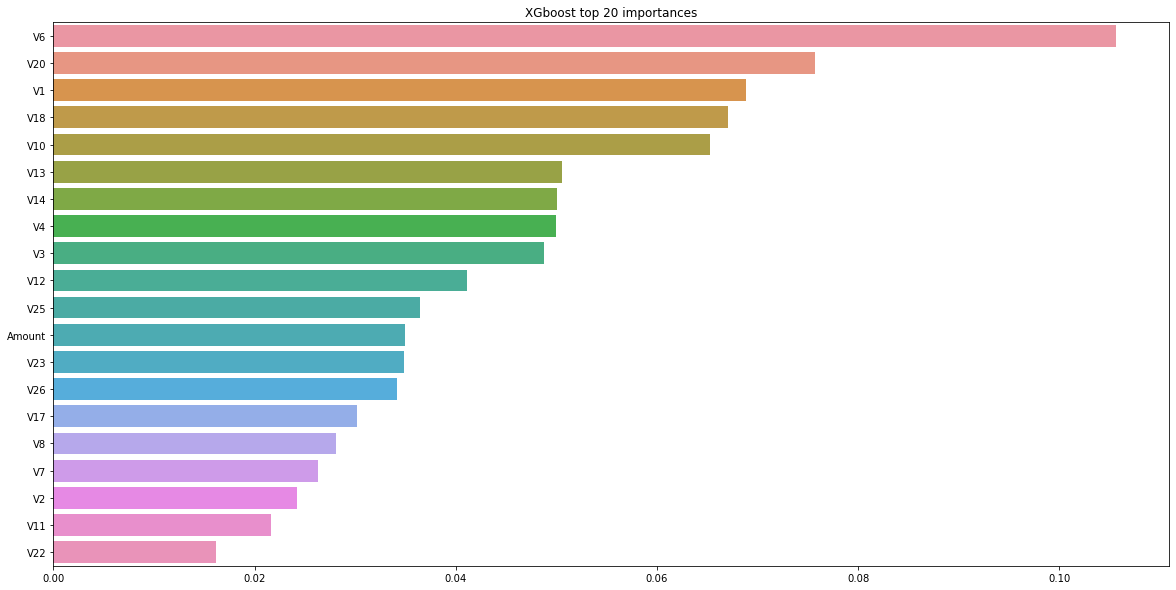

In [46]:
imp_valuexg = pd.Series(xg_final.feature_importances_, index = UX.columns)
imp_valuexg.sort_values(ascending = False, inplace = True)
plt.figure(figsize = (20,10))
sns.barplot( x = imp_valuexg[:20], y = imp_valuexg.index[:20])
plt.title("XGboost top 20 importances")
plt.show()

## Result Summary

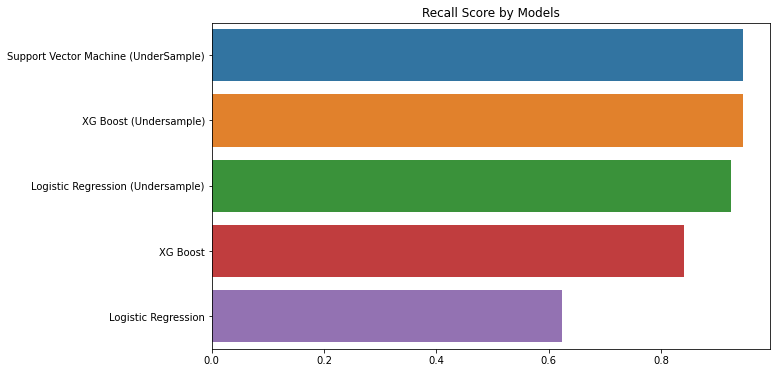

In [47]:
res_sr = pd.Series(res)
res_sr.sort_values(ascending = False, inplace = True)
plt.figure(figsize = (10,6))
sns.barplot( x = res_sr, y = res_sr.index)
plt.title("Recall Score by Models")
plt.show()

Using 1000 samples performed better than using 280000 samples\
Support Vector Machine worked Best for this problem